In [1]:
import pandas as pd
import numpy as np

In [2]:
class Bayes_Classifier:
    def __init__(self, genero, idade, escolaridade, profissao, target):
        self.genero = genero
        self.idade = idade
        self.escolaridade = escolaridade
        self.profissao = profissao
        self.target = target
        self.carrega_tabela("naive-bayes-classificador-2.csv")

    def carrega_tabela(self, tabela):
        self.csv = pd.read_csv(tabela, sep=',')

    def calculate_prior(self, Y):
        tabela = self.csv
        classes = sorted(list(tabela[Y].unique()))
        prior = []
        for i in classes:
            prior.append(len(tabela[tabela[Y]==i])/len(tabela))
        return prior
    
    def likelihood(self, Y, label, target, value_target):
        tabela = self.csv
        tabela = tabela[tabela[target]==value_target]
        total_target = len(tabela[target])
        tabela = tabela[tabela[Y]==label]
        total_Y = len(tabela[Y])
        result = total_Y/total_target
        print(result)

        return tabela

    def calculate_likelihood_gaussian(self, feat_name, X, Y, label):
        """
            feat_name: target
            X: valor a testar
            Y: tabela selecionada
            label: preditor
        """
        tabela = self.csv
        feat = list(tabela.columns)

        tabela = tabela[tabela[Y]==label]
        media, desv_pad = tabela[feat_name].mean(), tabela[feat_name].std()

        # função de densidade
        p_x_given_y = (1 / (np.sqrt(2 * np.pi) * (desv_pad**2))) *  np.exp(-((X-media)**2 / (2 * desv_pad**2 )))
        return p_x_given_y

    def naive_bayes_gaussian(self, X, Y):
        """
            feat_name: target
            X: valor a testar
            Y: tabela selecionada
            label: preditor
        """
        tabela = self.csv
        # get feature names
        features = list(tabela.columns)[:-1]

        # calculate prior
        prior = self.calculate_prior(Y)

        Y_pred = []
        # loop over every data sample
        for x in X:
            # calculate likelihood
            labels = sorted(list(tabela[Y].unique()))
            likelihood = [1]*len(labels)
            for j in range(len(labels)):
                for i in range(len(features)):
                    likelihood[j] *= self.calculate_likelihood_gaussian(features[i], x[i], Y, labels[j])

            # calculate posterior probability (numerator only)
            post_prob = [1]*len(labels)
            for j in range(len(labels)):
                post_prob[j] = likelihood[j] * prior[j]

            Y_pred.append(np.argmax(post_prob))

        return np.array(Y_pred)

In [3]:
a = Bayes_Classifier("F","a - Ate 25 anos ","Fundamental","b",0)
print(a.likelihood("escolaridade", "Medio", "target", 1))


0.3082901554404145
    genero             idade escolaridade profissao  target
1        M   a - Ate 25 anos        Medio         d       1
20       F  b - 26 a 35 anos        Medio         a       1
21       M  b - 26 a 35 anos        Medio         b       1
22       M   a - Ate 25 anos        Medio         b       1
25       F  c - 36 a 45 anos        Medio         b       1
..     ...               ...          ...       ...     ...
982      M  d - 46 a 55 anos        Medio         e       1
990      F  b - 26 a 35 anos        Medio         a       1
993      F   a - Ate 25 anos        Medio         b       1
997      M  b - 26 a 35 anos        Medio         b       1
999      F  b - 26 a 35 anos        Medio         c       1

[238 rows x 5 columns]


AxesSubplot(0.125,0.125;0.775x0.755)
genero [0.583, 0.417]


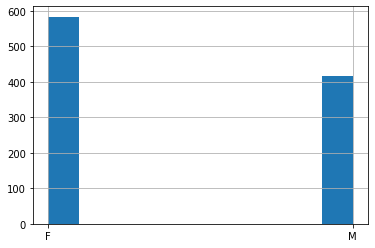

In [4]:
print(a.csv['genero'].hist())
print('genero', a.calculate_prior('genero'))

AxesSubplot(0.125,0.125;0.775x0.755)
idade [0.208, 0.297, 0.245, 0.141, 0.109]


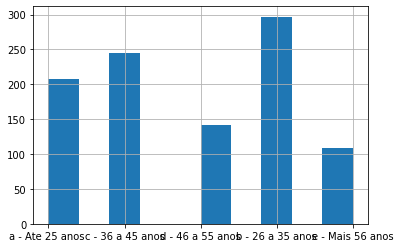

In [5]:
print(a.csv['idade'].hist())
print('idade', a.calculate_prior('idade'))

AxesSubplot(0.125,0.125;0.775x0.755)
escolaridade [0.501, 0.301, 0.048, 0.15]


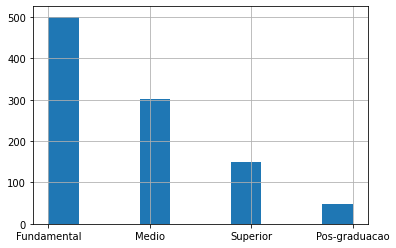

In [6]:
print(a.csv['escolaridade'].hist())
print('escolaridade', a.calculate_prior('escolaridade'))

AxesSubplot(0.125,0.125;0.775x0.755)
profissao [0.399, 0.423, 0.065, 0.069, 0.044]


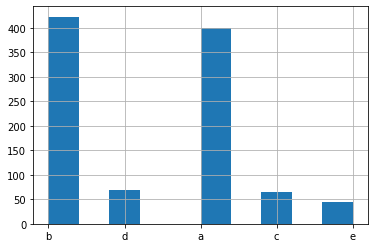

In [7]:
print(a.csv['profissao'].hist())
print('profissao', a.calculate_prior('profissao'))

AxesSubplot(0.125,0.125;0.775x0.755)
target [0.228, 0.772]


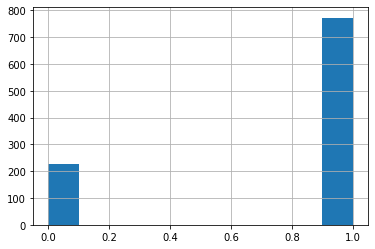

In [8]:
print(a.csv['target'].hist())
print('target', a.calculate_prior('target'))